In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label
from scipy.integrate import quad, trapezoid
import scipy.interpolate as scint
from mpl_toolkits.axisartist.axislines import SubplotZero
from sympy import solve, Poly, Eq, Function, exp, symbols

Figure 2.1: Morse Potential

In [2]:
def morse(D_e, b, r, r_e):
    V = D_e*(1-np.exp(-b*(r-r_e)))**2
    return V

In [3]:
# Energy levels function: Should create hlines with same length as width of potential
# The spacing between the lines should decrease with increasing energy

def energy_levels(levels, wavenumber, anharmonicity, D_e, b, r_e):
    energy_levels = []
    distance = []
    for v in range(levels+1):
        E_v = (v+0.5)*wavenumber-((v+0.5)**2)*wavenumber*anharmonicity
        energy_levels.append(E_v)
        r = symbols('r')
        dist = solve(D_e*(1-exp(-b*(r-r_e)))**2-E_v)
        distance.append(dist)
    distance_array = np.array(distance)
    return energy_levels, distance_array

In [4]:
D_e = 38000 # cm^-1
r_e = 1.5 # Å
r = np.arange(0.5, 7.51, 0.01)
b = 0.85
wn = 3650
anh = 0.02
lvl = 13

V_r = morse(D_e, b, r, r_e)
levels_list, distance = energy_levels(lvl, wn, anh, D_e, b, r_e)

In [5]:
labels_list = [r'E$_{0}$', r'E$_{1}$', r'E$_{2}$', r'E$_{3}$', r'E$_{4}$', r'E$_{5}$', r'E$_{6}$', r'E$_{7}$', r'E$_{8}$',
               r'E$_{9}$', r'E$_{10}$', r'E$_{11}$', r'E$_{12}$', r'E$_{13}$', r'E$_{14}$', r'E$_{15}$']

<function matplotlib.pyplot.show(close=None, block=None)>

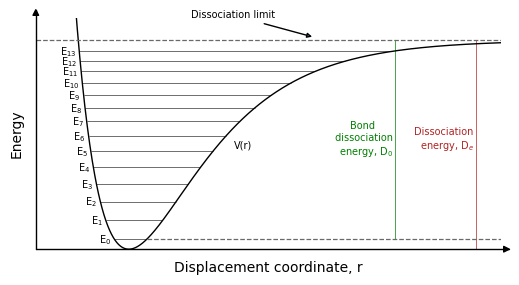

In [9]:
fig = plt.figure(figsize = (6,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")#AxislineStyle.FilledArrow(facecolor = "k")) #"-|>"

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

sns.lineplot(x = r, y = V_r, color = 'k', lw = 1)
ax.text(3.2, 38000/2-730, 'V(r)', fontsize = 7)
ax.hlines(38000, 0, 7.5, linestyle = '--', color = 'dimgrey', lw = 0.9)
ax.hlines(levels_list[0], distance[0][1], 7.5, linestyles = '--', color = 'dimgrey', lw = 0.9)
for n in range(len(levels_list)):
    ax.hlines(levels_list[n], distance[n][0], distance[n][1]-0.01, lw = 0.4, color = 'k', zorder = -10)
    ax.text(distance[n][0]-0.05, levels_list[n]-710, labels_list[n], fontsize = 7, ha = 'right')
ax.arrow(7.1, 0, 0, 38000, color = 'firebrick', lw = 0.5)
ax.text(6.6, 38000/2-730, 'Dissociation \n energy, D$_{e}$', fontsize = 7, color = 'firebrick', ha = 'center')
ax.arrow(5.8, levels_list[0], 0, 38000-levels_list[0], color = 'g', lw = 0.5)
ax.text(5.3, 38000/2-1800, 'Bond \n dissociation \n energy, D$_{0}$', fontsize = 7, color = 'g', ha = 'center')
ax.annotate('Dissociation limit', xy = (4.5, 38500), xytext = (2.5, 42000), 
            arrowprops=({'arrowstyle': '-|>', 'lw': 1}), fontsize = 7)

ax.set_xlim(0, 7.5)
ax.set_ylim(0, 42000)
ax.set_ylabel('Energy')
ax.set_xlabel('Displacement coordinate, r')

plt.savefig('Morse_potential.png', dpi = 150)
plt.show()

Figure 2.2: Potential contour plot for a collinear A+BC collision

In [663]:
x = np.arange(-40, 40, 0.01)

C:\Users\nan25\AppData\Local\Temp\ipykernel_1840\562895828.py:25: RuntimeWarning: invalid value encountered in power
  sns.lineplot(x = x, y = 1/(0.3*(x)**(1.01)), color = 'k')
C:\Users\nan25\AppData\Local\Temp\ipykernel_1840\562895828.py:26: RuntimeWarning: invalid value encountered in power
  sns.lineplot(x = x, y = 1/(0.3*(x-0.5)**(1.01))+0.5, color = 'k')
C:\Users\nan25\AppData\Local\Temp\ipykernel_1840\562895828.py:42: RuntimeWarning: invalid value encountered in power
  sns.lineplot(x = x, y = 1/(0.3*(x-1.5)**(1.01))+1.5, linestyle = '--', lw = 1, color = 'tab:blue')
C:\Users\nan25\AppData\Local\Temp\ipykernel_1840\562895828.py:44: RuntimeWarning: invalid value encountered in power
  sns.lineplot(x = x, y = 1/(0.3*(x-2.5)**(1.01))+2.5, color = 'k')
C:\Users\nan25\AppData\Local\Temp\ipykernel_1840\562895828.py:45: RuntimeWarning: invalid value encountered in power
  sns.lineplot(x = x, y = 1/(0.3*(x-3)**(1.01))+3, color = 'k')


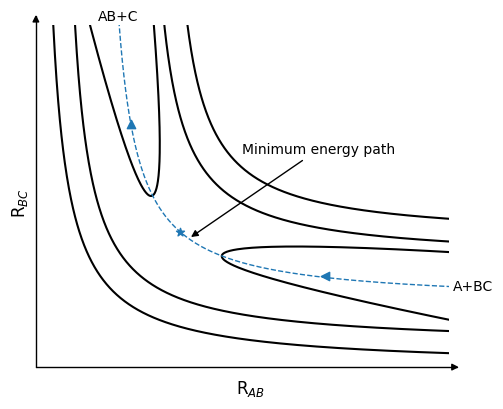

In [706]:
fig = plt.figure(figsize = (5,4))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.set_ylim(0, 8)
ax.set_xlim(0, 10)

sns.lineplot(x = x, y = 1/(0.3*(x)**(1.01)), color = 'k')
sns.lineplot(x = x, y = 1/(0.3*(x-0.5)**(1.01))+0.5, color = 'k')

def rot_xy(x,y,phi):
    x_rot, y_rot = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])@np.array([x,y])
    return x_rot, y_rot

x_rot, y_rot = rot_xy(x, 7*(x)**(2), np.pi/18)
plt.plot(x_rot+2.8, y_rot+4, color = 'k')

x_rot1, y_rot1 = rot_xy(x, 9*(x)**(2), -np.pi/2-np.pi/25)
plt.plot(x_rot1+4.5, y_rot1+2.6, color = 'k')

sns.lineplot(x = x, y = 1/(0.3*(x-1.5)**(1.01))+1.5, linestyle = '--', lw = 1, color = 'tab:blue')

sns.lineplot(x = x, y = 1/(0.3*(x-2.5)**(1.01))+2.5, color = 'k')
sns.lineplot(x = x, y = 1/(0.3*(x-3)**(1.01))+3, color = 'k')

plt.scatter(3.5, 1/(0.3*(3.5-1.5)**(1.01))+1.5, marker = '*', color = 'tab:blue')
plt.scatter(7, 1/(0.3*(7-1.5)**(1.01))+1.53, marker = '<', color = 'tab:blue')
plt.scatter(2.3, 1/(0.3*(2.3-1.5)**(1.01))+1.5, marker = '^', color = 'tab:blue')

ax.annotate('Minimum energy path', xy = (3.7, 1/(0.3*(3.7-1.5)**(1.01))+1.5), xytext = (5, 5), 
            arrowprops=({'arrowstyle': '-|>', 'lw': 1, 'facecolor':'k'}), fontsize = 10)
ax.text(10.1, 1.8, 'A+BC')
ax.text(1.5, 8.1, 'AB+C')

fig.supxlabel('R$_{AB}$')
fig.supylabel('R$_{BC}$')

plt.tight_layout(pad=0.5)
plt.savefig('ABC_collision.png', dpi = 150)
plt.show()

Figure 2.3: Potential profile along the minimum energy path

In [707]:
def gauss(sigma, x, mu):
    y = (1/sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)
    return y

In [708]:
sigma = 1.3
mu = 0
x = np.arange(-3.5, 3.5, 0.01)
y = gauss(sigma, x, mu)

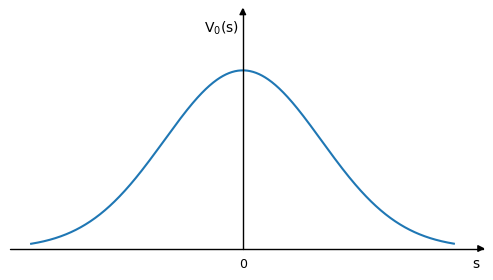

In [717]:
fig = plt.figure(figsize = (6,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

    # removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(x, y)

ax.text(0, -0.2, '0', ha = 'center', fontsize = 9)
ax.text(3.8, -0.2, 's')
ax.text(-0.35, 2.35, 'V$_{0}$(s)', ha = 'center')

ax.set_ylim(0, 2.5)

plt.savefig('potential_profile.png', dpi = 150)
plt.show()

Figure 2.4: Singlet and triplet states represented by Morse and anti Morse potential curves

In [8]:
def potentials(D_e, b, r, r_e):
    q = r-r_e
    V_morse = D_e*(1-np.exp(-b*q))**2
    V_anti = (D_e/2)*(np.exp(-2*b*q)+2*np.exp(-b*q))
    return V_morse, V_anti

In [195]:
D_e = 10**(-3)
r_e = 1.25 # Å
r = np.arange(0.25, 4, 0.001)
b = 1.75

V_morse, V_anti = potentials(D_e, b, r, r_e)

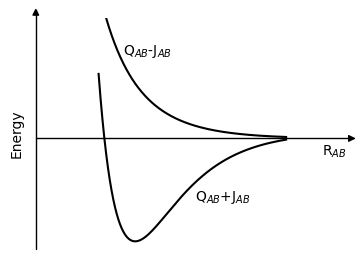

In [224]:
fig = plt.figure(figsize = (4,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

sns.lineplot(x = r[540:2900], y = V_morse[540:2900]-0.94*D_e, color = 'k')
sns.lineplot(x = r[0:3400]-0.5, y = V_anti[0:3400]-2*10**(-6), color = 'k')

ax.text(2, V_morse[1750]-1.1*D_e, 'Q$_{AB}$+J$_{AB}$')
ax.text(1.1, V_anti[1300], 'Q$_{AB}$-J$_{AB}$')

ax.set_xlim(0, 3.9)
ax.set_ylim(-1.01*D_e, 1.1*D_e)

ax.set_ylabel('Energy')
ax.text(3.6, -0.15*D_e, 'R$_{AB}$')

plt.savefig('morse_anti_potential.png', dpi = 150)
plt.show()

Figure 2.5:  Effect of initial excitation on the reactivity for early and late barriers

In [853]:
def make_subplots(axes, xdataname, ydataname, xcon, ycon, n, xmin1, xmax, xmin2, m):
    ax = axes
    # pathway along reaction path
    ax.plot(xdataname, ydataname, color = 'k')
    sns.lineplot(x = xcon, y = ycon, color = 'k', ax = ax)
    # Frame
    ax.hlines(ydataname.min()-n, xmin1, xmax, color = 'k', lw = 1.2)
    ax.hlines(ydataname.max()+n, xmin2, xmax, color = 'k', lw = 1.2)
    ax.vlines(xmin1, ydataname.min()-n, m*ydataname.max()+n, color = 'k', lw = 1.2)
    ax.vlines(xmin2, ydataname.max()+n, m*ydataname.max()+n, color = 'k', lw = 1.2)
    # Remove ticks
    ax.set_ylabel(None, fontsize = 0)
    ax.set_xlabel(None, fontsize = 0)
    plt.xticks([], [])
    plt.yticks([], [])
    ax.set_xticks([]) # for major ticks
    ax.set_yticks([])
    ax.set_xticks([], minor=True) # for minor ticks
    ax.set_yticks([], minor=True)
    sns.despine(top=True, right=True, left=True, bottom=True)

In [854]:
def make_subplots_a(axes, xdataname, ydataname, xcon, ycon, n, m): # xmin1, xmax, xmin2
    ax = axes
    # pathway along reaction path
    ax.plot(xdataname, ydataname, color = 'k')
    sns.lineplot(x = xcon, y = ycon, color = 'k', ax = ax)
    # Frame
    ax.hlines(ycon[0]-5, xdataname.min()-n, m*xdataname.max()+n, color = 'k', lw = 1.2)
    ax.hlines(ycon[0]+5, xdataname.max()+n, m*xdataname.max()+n, color = 'k', lw = 1.2)
    ax.vlines(xdataname.min()-n, ycon[0]-5, ydataname[-1], color = 'k', lw = 1.2)
    ax.vlines(xdataname.max()+n, ycon[0]+5, ydataname[-1], color = 'k', lw = 1.2)
    # Remove ticks
    ax.set_ylabel(None, fontsize = 0)
    ax.set_xlabel(None, fontsize = 0)
    plt.xticks([], [])
    plt.yticks([], [])
    ax.set_xticks([]) # for major ticks
    ax.set_yticks([])
    ax.set_xticks([], minor=True) # for minor ticks
    ax.set_yticks([], minor=True)
    sns.despine(top=True, right=True, left=True, bottom=True)

In [855]:
def make_subplots_d(axes, xdataname, ydataname, xmin1, xmax, xmin2, ymin, ymax):
    ax = axes
    # pathway along reaction path
    ax.plot(xdataname, ydataname, color = 'k')
    # Frame
    ax.hlines(-ymin, xmin1, xmax, color = 'k', lw = 1.2)
    ax.hlines(ymin, xmin2, xmax, color = 'k', lw = 1.2)
    ax.vlines(xmin1, -ymin, ymax, color = 'k', lw = 1.2)
    ax.vlines(xmin2, ymin, ymax, color = 'k', lw = 1.2)
    # Remove ticks
    ax.set_ylabel(None, fontsize = 0)
    ax.set_xlabel(None, fontsize = 0)
    plt.xticks([], [])
    plt.yticks([], [])
    ax.set_xticks([]) # for major ticks
    ax.set_yticks([])
    ax.set_xticks([], minor=True) # for minor ticks
    ax.set_yticks([], minor=True)
    sns.despine(top=True, right=True, left=True, bottom=True)

In [109]:
x_1 = np.arange(-np.pi, 6*np.pi, 0.01)
y_1 = np.sin(x_1)

x_1c = np.arange(-np.pi*0.8, 6*np.pi, 0.01)
y_1c = np.sin(x_1c)
y_c = np.arange(y_1[0], 8*y_1.max()+0.75, 0.01)
x_c = np.zeros(len(y_c))+x_1[0]

x_c1 = np.arange(np.pi, 15*np.pi/2, 0.01)
y_c1 = np.cos(x_c1)+1
x_c2 = np.arange(1.6, np.pi, 0.001)
y_c2 = (np.exp(4/x_c2))*(np.cos(x_c2)+1)


x_d = np.arange(-np.pi/2, 13*np.pi/2, 0.01)
y_d = np.cos(x_d)

In [198]:
def rot_xy(x,y,phi):
    x_rot, y_rot = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])@np.array([x,y])
    return x_rot, y_rot

x = np.linspace(-5, 5, 1000)
x_rot, y_rot = rot_xy(x, np.log(np.cosh(x)), -np.pi/2)

In [780]:
xb = np.linspace(0.01, np.pi, 1000)
xb1_rot, yb1_rot = rot_xy(xb, 1/(1+np.exp(-xb**2))*np.sin(0.7*(2*(np.exp(0.8*xb)-1)+0.3*xb)), np.pi/2)
xb2_rot, yb2_rot = rot_xy(xb1_rot, yb1_rot+4.5/xb**0.1, -np.pi/2)

In [821]:
xb1 = np.linspace(0, 2*np.pi/0.3, 1000)
xb1_rot, yb1_rot = rot_xy(xb1, np.log(np.cosh(0.5*(xb1-6))), -np.pi/2)
yb1 = -np.cos(0.3*xb1)+np.cos(0.15*xb1)
xb2 = np.linspace(xb1_rot[-1], xb1_rot[-1]+3*np.pi, 1000)

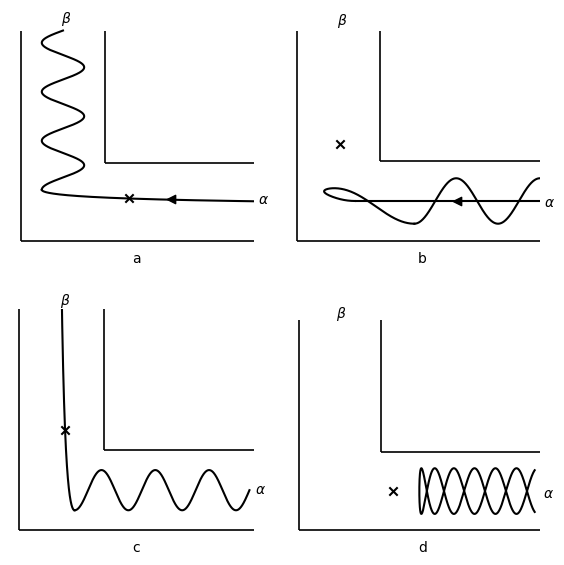

In [873]:
fig, axes = plt.subplots(2,2, figsize=(6,6))

make_subplots_a(axes[0][0], y_c1, x_c1, y_c2, x_c2, 1, 8)
axes[0][0].scatter(x_c2[0]+2.5, x_c2[0]+0.45, marker = 'x', color = 'k')
axes[0][0].scatter(x_c2[0]+4.5, x_c2[0]+0.4, marker = '<', color = 'k')
axes[0][0].text(10.2, x_c2[0]-0.3, r'$\alpha$')
axes[0][0].text(y_c1[0]+0.9, x_c1[-1]+1, r'$\beta$')
axes[0][0].set_xlim(-1.5,10)

make_subplots_d(axes[0][1], xb1_rot, yb1, -2, xb1_rot[-1]+3*np.pi, 4.2, 3.5, 15)
axes[0][1].hlines(0, xb1_rot[0],xb1_rot[-1]+3*np.pi, color = "k")
axes[0][1].plot(xb2, -2*np.cos(xb2-xb1_rot[-1]), color = "k")
axes[0][1].scatter(10, 0, marker = '<', color = 'k')
axes[0][1].scatter(1.2, 5, marker = 'x', color = 'k')
axes[0][1].text(xb1_rot[-1]+3.1*np.pi, -0.5, r'$\alpha$')
axes[0][1].text(1, 15.5, r'$\beta$')
axes[0][1].set_xlim(-2.1, xb1_rot[-1]+3*np.pi)

make_subplots(axes[1][0], x_c1, y_c1, x_c2, y_c2, 1, x_c2[0]-5, x_c1[-1]+0.5, x_c2[0]+5, 8)
axes[1][0].scatter(x_c2[0]+0.4, y_c1.max()+2, marker = 'x', color = 'k')
axes[1][0].text(x_c1[-1]+0.6, y_c1[-1]-0.2, r'$\alpha$')
axes[1][0].text(x_c2[0]-0.2, 10.2, r'$\beta$')
axes[1][0].set_xlim(x_c2[0]-6, x_c1[-1]+0.5)
axes[1][0].set_ylim(-1.5,10)

make_subplots_d(axes[1][1], x_rot, np.sin(4*x), -4.5, 4.5, -1.45, 1.7, 7.5)
axes[1][1].scatter(-1, 0, marker = 'x', color = 'k')
axes[1][1].text(4.6, -0.3, r'$\alpha$')
axes[1][1].text(-3.1, 7.6, r'$\beta$')
axes[1][1].set_xlim(-4.6, 4.5)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.5, -0.05, l, transform = ax.transAxes, fontsize = 10)

plt.tight_layout(pad = 2)
plt.savefig('barriers.png', dpi = 150)
plt.show()